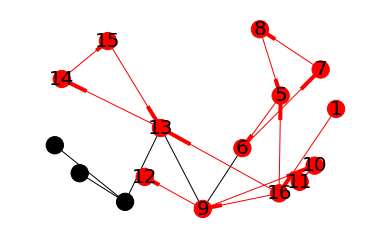

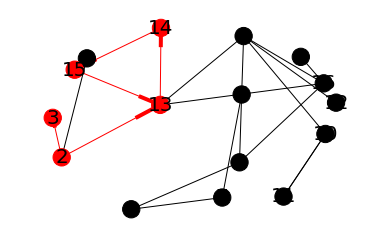

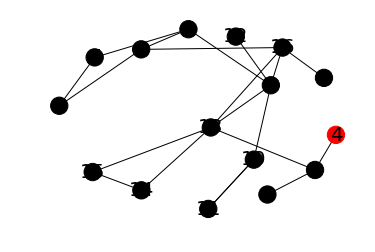

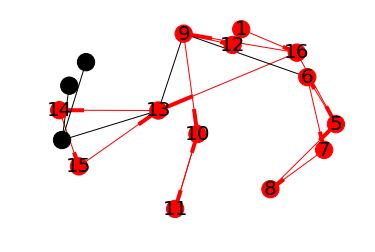

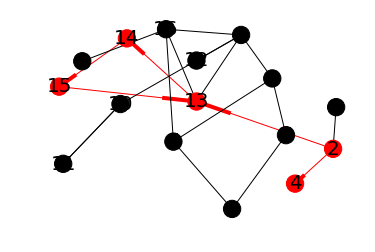

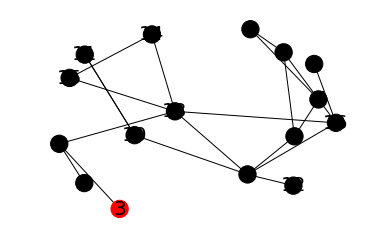

{1: 13, 2: 5, 3: 1, 4: 1, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 2, 11: 2, 12: 1, 13: 3, 14: 3, 15: 3, 16: 12}


In [18]:
# Computes the size of the maximum control range (SMCR) for each node in the network
# Inputs are:
#    G, the network digraph
#    AllMM, list of dicts containing all maximum matching configurations

from lib import BuildCF as CF
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import TestNetworks



def SMCR(G,AllMM):
    maxCRs = {}
    for n in G.nodes():
        maxCRs[n] = 1 #initialize all SMCRs to 1
    nIter = 0
    for MMdict in AllMM: #loop over matching configurations
        nIter += 1
        print('SMCR: Computing for matching ', nIter)
        MM = nx.DiGraph()
        MM.add_nodes_from(G.nodes())
        edgeList = []
        for key in MMdict: #convert dict of edges to nx digraph
            edgeList.append([key,MMdict[key]])
        MM.add_edges_from(edgeList)
        cacti = CF.BuildCF(G,MM)
#         for k in cacti:
#             c = cacti[k]
#             CF.drawCactus(G,c)
        for n in G.nodes():
            try:
                nodeCact = CF.downstreamCactus(cacti,n)
                CR = len(nodeCact.nodes())
                if CR > maxCRs[n]:
                    maxCRs[n] = CR
            except ValueError: #will be raised if n is the node that was knocked out for this MM
                pass
                
    return maxCRs
        
        


# G = TestNetworks.testNet(4)
# AllMM = [{1:16,2:3,5:6,6:7,7:8,8:5,9:12,10:11,11:10,13:14,14:15,15:13,16:9},{1:16,2:4,5:6,6:7,7:8,8:5,9:12,10:11,11:10,13:14,14:15,15:13,16:9}]

# maxCRs = SMCR(G,AllMM)
# print(maxCRs)

